Ketentuan
1. Pakai database sakila
2. Lakukan join ke table apapun yang penting dapat memberikan nilai.
3. SImpan hasil join tsb ke dalam dataframe
4. Lakukan 5 visualisasi untuk data yang diambil dari sakila
5. Lakukan juga uji perbandingan nilai

In [1]:
import mysql.connector as cn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import kruskal, mannwhitneyu

%matplotlib inline

In [2]:
mydb = cn.connect(
    host = 'localhost',
    user = 'root',
    passwd = input('Masukan Password MySQL : '),
    database = input('Pilih Database Yang Digunakan : ')
)

In [3]:
mycursor = mydb.cursor()

def query (x) :
    mycursor.execute (x)
    result = mycursor.fetchall()
    df = pd.DataFrame(result, columns = mycursor.column_names)
    return df

In [4]:
query(
    '''
    show tables    
    '''
)

,Tables_in_sakila
0,actor
1,actor_info
2,address
3,category
4,city
5,country
6,customer
7,customer_list
8,film
9,film_actor


In [5]:
df = query(
    '''
    SELECT *
    FROM FILM F
    JOIN film_category FC ON F.film_id = FC.film_id 
    JOIN category C ON FC.category_id = C.category_id
    '''
)
df

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update,film_id,category_id,last_update,category_id,name,last_update
0,19,AMADEUS HOLY,A Emotional Display of a Pioneer And a Technic...,2006,1,None,6,0.99,113,20.99,PG,"{Deleted Scenes, Commentaries, Behind the Scenes}",2006-02-15 05:03:42,19,1,2006-02-15 05:07:09,1,Action,2006-02-15 04:46:27
1,21,AMERICAN CIRCUS,A Insightful Drama of a Girl And a Astronaut w...,2006,1,None,3,4.99,129,17.99,R,"{Commentaries, Behind the Scenes}",2006-02-15 05:03:42,21,1,2006-02-15 05:07:09,1,Action,2006-02-15 04:46:27
2,29,ANTITRUST TOMATOES,A Fateful Yarn of a Womanizer And a Feminist w...,2006,1,None,5,2.99,168,11.99,NC-17,"{Deleted Scenes, Trailers, Commentaries}",2006-02-15 05:03:42,29,1,2006-02-15 05:07:09,1,Action,2006-02-15 04:46:27
3,38,ARK RIDGEMONT,A Beautiful Yarn of a Pioneer And a Monkey who...,2006,1,None,6,0.99,68,25.99,NC-17,"{Deleted Scenes, Trailers, Commentaries, Behin...",2006-02-15 05:03:42,38,1,2006-02-15 05:07:09,1,Action,2006-02-15 04:46:27
4,56,BAREFOOT MANCHURIAN,A Intrepid Story of a Cat And a Student who mu...,2006,1,None,6,2.99,129,15.99,G,"{Trailers, Commentaries}",2006-02-15 05:03:42,56,1,2006-02-15 05:07:09,1,Action,2006-02-15 04:46:27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,931,VALENTINE VANISHING,A Thrilling Display of a Husband And a Butler ...,2006,1,None,7,0.99,48,9.99,PG-13,"{Trailers, Behind the Scenes}",2006-02-15 05:03:42,931,16,2006-02-15 05:07:09,16,Travel,2006-02-15 04:46:27
996,977,WINDOW SIDE,A Astounding Character Study of a Womanizer An...,2006,1,None,3,2.99,85,25.99,R,"{Deleted Scenes, Behind the Scenes}",2006-02-15 05:03:42,977,16,2006-02-15 05:07:09,16,Travel,2006-02-15 04:46:27
997,981,WOLVES DESIRE,A Fast-Paced Drama of a Squirrel And a Robot w...,2006,1,None,7,0.99,55,13.99,NC-17,{Behind the Scenes},2006-02-15 05:03:42,981,16,2006-02-15 05:07:09,16,Travel,2006-02-15 04:46:27
998,988,WORKER TARZAN,A Action-Packed Yarn of a Secret Agent And a T...,2006,1,None,7,2.99,139,26.99,R,"{Trailers, Commentaries, Behind the Scenes}",2006-02-15 05:03:42,988,16,2006-02-15 05:07:09,16,Travel,2006-02-15 04:46:27


In [6]:
df.isna().sum()

film_id                    0
title                      0
description                0
release_year               0
language_id                0
original_language_id    1000
rental_duration            0
rental_rate                0
length                     0
replacement_cost           0
rating                     0
special_features           0
last_update                0
film_id                    0
category_id                0
last_update                0
category_id                0
name                       0
last_update                0
dtype: int64

C:\Users\lidya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rental_rate', ylabel='length'>

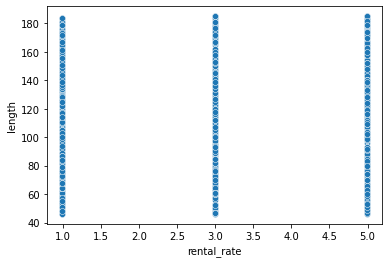

In [7]:
sns.scatterplot(df['rental_rate'],df['length'])

C:\Users\lidya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='language_id', ylabel='count'>

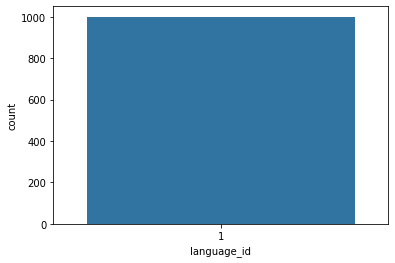

In [8]:
sns.countplot(df['language_id'])

In [9]:
df['rental_rate'].value_counts()

0.99    341
4.99    336
2.99    323
Name: rental_rate, dtype: int64

In [10]:
Stat_hit, pval = kruskal(df[df['rental_rate']=='0.99']['length'], 
                        df[df['rental_rate']=='2.99']['length'],
                        df[df['rental_rate']=='4.99']['length'])
if pval < 0.05 :
    print(pval,"Tolak H0")
else : 
    print(pval,"Gagal tolak H0")

nan Gagal tolak H0


In [ ]:
use sakila;
select * from actor Order by first_name;
select count(*) as 'Banyaknya actor' from actor;
select count(*) as 'Banyaknya Genre' from category;
select * from city,country where city.country_id = country.country_id;
select count(*) as "Banyaknya city" from city;
select count(*) as "Banyaknya country" from country;

-- jadi tau banyaknya kota di suatu negara
select * from city where country_id =44;

-- u/ tau banyaknya judul yang mulai dengan huruf a
select count(title), release_year from film where title like'A%';
select count(*) from film;

-- banyaknya film 1000
select count(film_id) from film_actor;

-- banyaknya data 5462
select count(distinct film_id) from film_actor;

-- banyaknya film 997 3 film gaada data?
select count(distinct actor_id) from film_actor;

-- banyaknya actor 200


-- untuk tau bnyknya cust di setiap store
select store_id, count(customer_id) from customer group by store_id;

-- untuk tau setiap customernya siapa aja udh diurutin based on store
select * from customer order by store_id;
select distinct special_features from film;
select count(distinct special_features) from film;
select special_features, count(title) from film group by special_features;
select special_features,title from film where special_features like '%deleted scenes%';

-- nampilin artis apa main di film apa aja
select actor.first_name, actor.last_name, film_actor.film_id, film.title
from film, film_actor, actor
where film_actor.actor_id =  actor.actor_id and film.film_id = film_actor.film_id;

-- untuk nampilin list film yg ada di toko x * problem gabisa jumlahin datanya brp banyak
select store_id, film.title  from inventory, film where inventory.film_id = film.film_id group by title order by store_id ;

-- u/ cek customer yg sewanya paling banyak
select customer_id, sum(amount) from payment group by customer_id order by sum(amount) desc limit 3; 

-- rata2 durasi peminjaman
SELECT rating,
	count(*) AS count,
	AVG(rental_duration) avg_rent_duration,
    AVG(rental_rate) avg_rental_rate,
    AVG (length) avg_length,
    AVG(replacement_cost) avg_replacement
FROM film
GROUP BY 1
ORDER BY field(rating, "G","PG","PG-13","R","NC-17");

-- FIND TOM ID
SELECT *
FROM sakila.actor
WHERE first_name like "TOM";

-- show the film id that starred by TOM
SELECT film_id
FROM film_actor
WHERE actor_id in (38,42);

-- show all the films that is starred by TOM
SELECT title, rating, length
FROM sakila.film
WHERE film_id IN (SELECT film_id FROM film_actor where actor_id in (38,42));

-- show fils that is starred by TOM and have PG rating
SELECT title, rating, length
FROM sakila.film
WHERE film_id in (SELECT film_id FROM film_actor WHERE actor_id in (38,42)) 
	AND rating like "PG";

-- further filter films to only have a duration under 60 mins since the class break is only 1 hr
SELECT *
FROM sakila.film
WHERE
	film_id in (SELECT film_id FROM film_actor WHERE actor_id in (38,42))
    AND rating like "PG%"
    AND length <60;
--  
SELECT active,
	count(*) count,
    ROUND((count(*)/(SELECT count(*) FROM customer) * 100),2) percentage
FROM customer
GROUP BY 1;

-- 10 barus cust id
SELECT 
-- *
	C.customer_Id, 
    R.Rental_ID,
    P.Amount,
    P.Payment_Date
FROM CUSTOMER C
JOIN RENTAL R ON C.customer_id = R.customer_id
JOIN PAYMENT P ON  R.rental_id = P.rental_id
LIMIT 10
;

--
SELECT title, release_year, rental_duration
FROM film
WHERE title like "S%"
LIMIT 10
;

--
SELECT rental_duration as Durasi_rental, count(title) as Banyak_film, ROUND(avg(length),2) as Rata_Rata_Durasi_Film
FROM FILM
GROUP BY rental_duration
ORDER BY rental_duration
;

--
SELECT title, length, rating
FROM FILM
WHERE length > (SELECT avg(length) FROM FILM)
ORDER BY length desc
LIMIT 25
;

--
SELECT Rating, MAX(Replacement_cost), min(rental_rate), avg(length)
FROM FILM
GROUP BY rating
ORDER BY rating
;

--
SELECT F.title, F.length, L.name
FROM FILM F
JOIN language L ON F.language_id = L.language_id 
WHERE F.title like "%K"
LIMIT 15
;

--
SELECT F.title as Judul_Film, A.first_name, A.last_name
FROM FILM F
JOIN FILM_ACTOR FA ON F.film_id = FA.film_id
JOIN ACTOR A ON A.actor_id = FA.actor_id
WHERE A.actor_id = 14	;

--
SELECT city, country_id
FROM city
WHERE city like "%d%a"
limit 15;

--
SELECT C.name as GENRE , count(title) as Banyaknya_Film
FROM FILM F
JOIN film_category FC ON F.film_id = FC.film_id 
JOIN category C ON FC.category_id = C.category_id
GROUP BY GENRE
ORDER BY Banyaknya_film	
;

--
SELECT title, description,length,rating
FROM FILM
WHERE title like "%h" and length > (SELECT avg(length) from film)
LIMIT 10;
